# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sandnessjoen
Processing Record 2 of Set 1 | tazovsky
Processing Record 3 of Set 1 | upper grand lagoon
Processing Record 4 of Set 1 | alice springs
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | atafu village
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | usogorsk
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | st. john's
Processing Record 15 of Set 1 | ribas do rio pardo
Processing Record 16 of Set 1 | puerto baquerizo moreno
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | fisterra
Processing Record 21 of Set 1 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sandnessjoen,66.0217,12.6316,4.33,60,100,9.27,NO,1732409790
1,tazovsky,67.4667,78.7000,-12.10,94,51,3.94,RU,1732409790
2,upper grand lagoon,30.1633,-85.7408,13.34,83,0,0.00,US,1732409790
3,alice springs,-23.7000,133.8833,22.75,73,100,5.66,AU,1732409790
4,olonkinbyen,70.9221,-8.7187,-3.86,55,21,8.04,SJ,1732409790


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sandnessjoen,66.0217,12.6316,4.33,60,100,9.27,NO,1732409790
1,tazovsky,67.4667,78.7000,-12.10,94,51,3.94,RU,1732409790
2,upper grand lagoon,30.1633,-85.7408,13.34,83,0,0.00,US,1732409790
3,alice springs,-23.7000,133.8833,22.75,73,100,5.66,AU,1732409790
4,olonkinbyen,70.9221,-8.7187,-3.86,55,21,8.04,SJ,1732409790


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

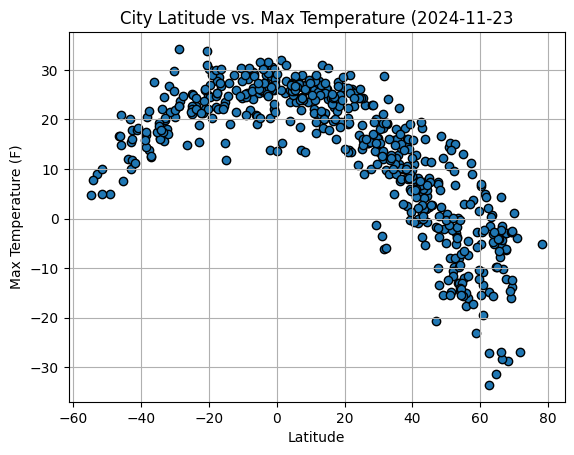

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (2024-11-23')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

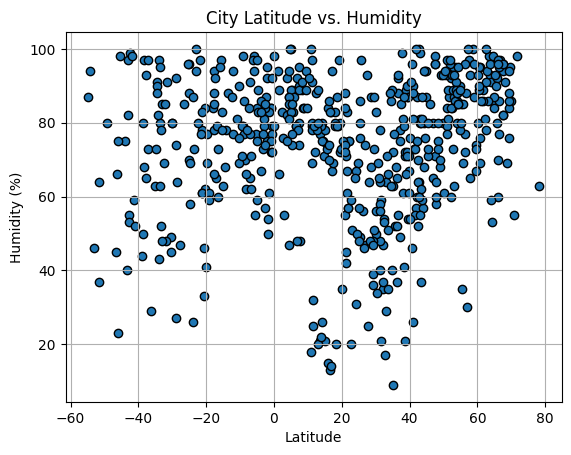

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

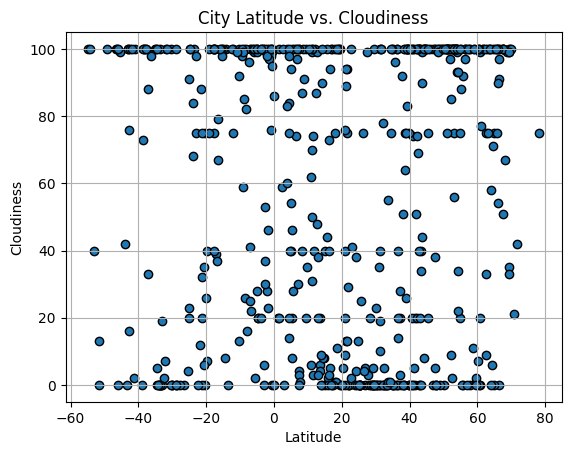

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black" )

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

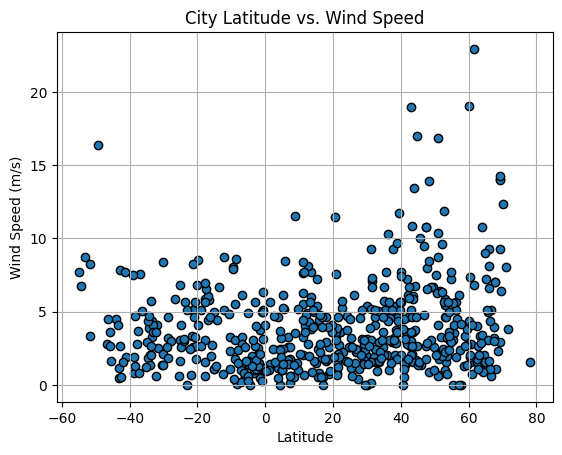

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def regress_plot(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)} x + {round(intercept,2)}")
    print(f"r-value: {rvalue}.")
    plt.scatter(x, y, edgecolors="black")
    plt.plot(x, regress, "r")
    plt.annotate(line_eq, (x.min(), y.min()), color="r", fontsize=12)
    plt.tight_layout()  

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sandnessjoen,66.0217,12.6316,4.33,60,100,9.27,NO,1732409790
1,tazovsky,67.4667,78.7000,-12.10,94,51,3.94,RU,1732409790
2,upper grand lagoon,30.1633,-85.7408,13.34,83,0,0.00,US,1732409790
4,olonkinbyen,70.9221,-8.7187,-3.86,55,21,8.04,SJ,1732409790
7,usogorsk,63.4106,48.6872,0.76,98,100,3.33,RU,1732409791


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,alice springs,-23.7000,133.8833,22.75,73,100,5.66,AU,1732409790
5,atafu village,-8.5421,-172.5159,28.85,70,26,8.60,TK,1732409790
6,adamstown,-25.0660,-130.1015,22.76,70,91,6.79,PN,1732409790
8,blackmans bay,-43.0167,147.3167,15.41,82,100,0.45,AU,1732409791
9,papatowai,-46.5619,169.4708,16.70,45,100,2.79,NZ,1732409791


###  Temperature vs. Latitude Linear Regression Plot

r-value: -0.8557290413081566.


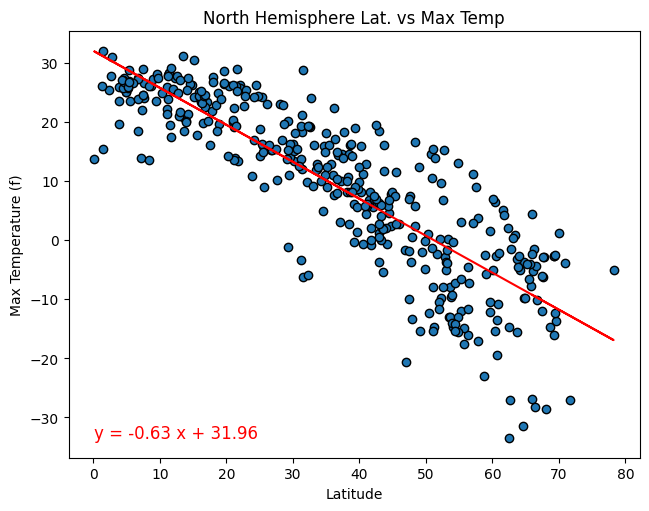

In [16]:
# Linear regression on Northern Hemisphere
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (f)")
plt.title("North Hemisphere Lat. vs Max Temp")
plt.show()

r-value: 0.7120003669984684.


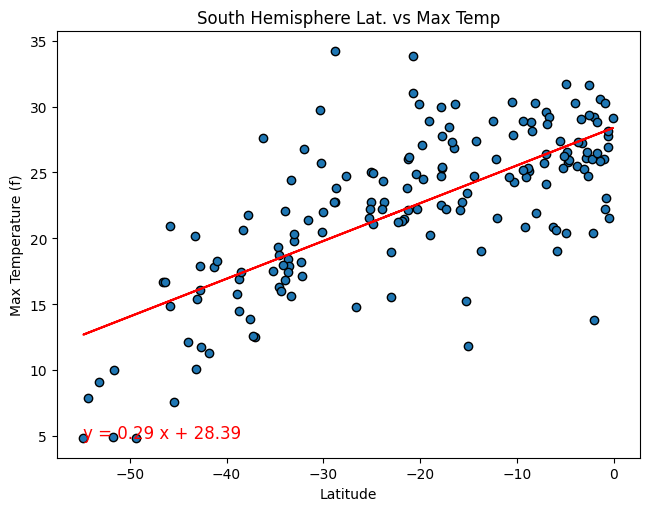

In [17]:
# Linear regression on Southern Hemisphere
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (f)")
plt.title("South Hemisphere Lat. vs Max Temp")
plt.show()

**Discussion about the linear relationship:** The regression plots show a relationship between lat and max temp in both hemispheres, with a difference in strength and direction. In the Northern Hemisphere, there is a strong negative correction (r = -0.856), where the temp decreases significantly as the lat increases (y = -0.63x + 31.96). In the Southern Hemisphere, there is a moderately strong positive correlation (r = 0.712), where temps rise and the lat moves closer to the equator (y = 0.29x + 28.39).

### Humidity vs. Latitude Linear Regression Plot

r-value: 0.23541182843123432.


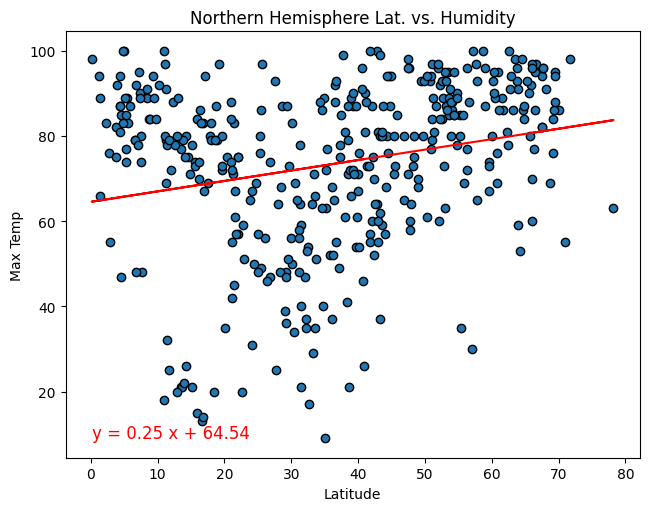

In [18]:
# Northern Hemisphere
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere Lat. vs. Humidity")
plt.show()

r-value: 0.20506823538247243.


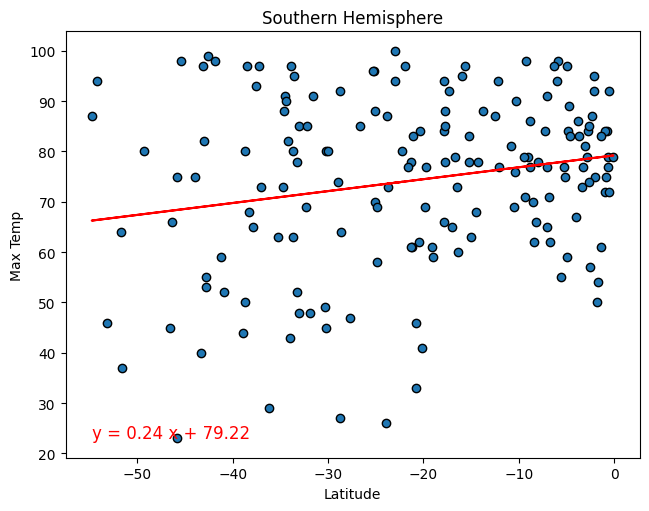

In [19]:
# Southern Hemisphere
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** The plots show a weak positive relationship between lat and humidity in both hemispheres. In the Northern Hemisphere (y = 0.25 + 64.54, r = 0.235) and the Southern Hemisphere (y = 0.24x + 79.22, r = 0.205), humidity increases with lat. However, the weak correlations and scattered data suggests the lat has little impact on overall humidity levels. 

### Cloudiness vs. Latitude Linear Regression Plot

r-value: 0.23683652702136979.


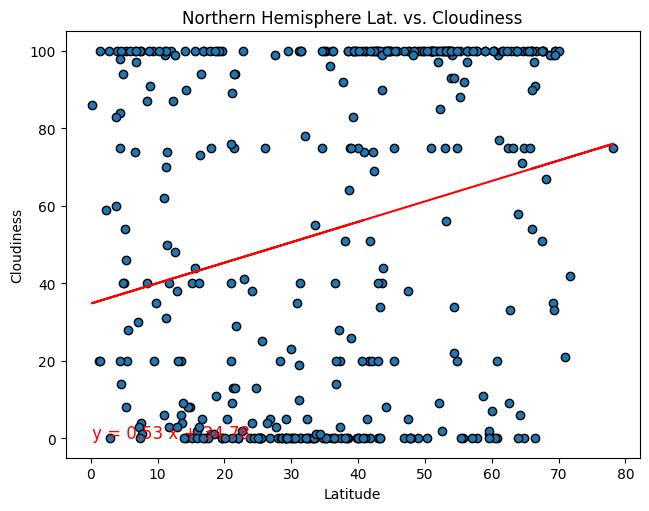

In [20]:
# Northern Hemisphere
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Lat. vs. Cloudiness")
plt.show()

r-value: 0.13243010570511843.


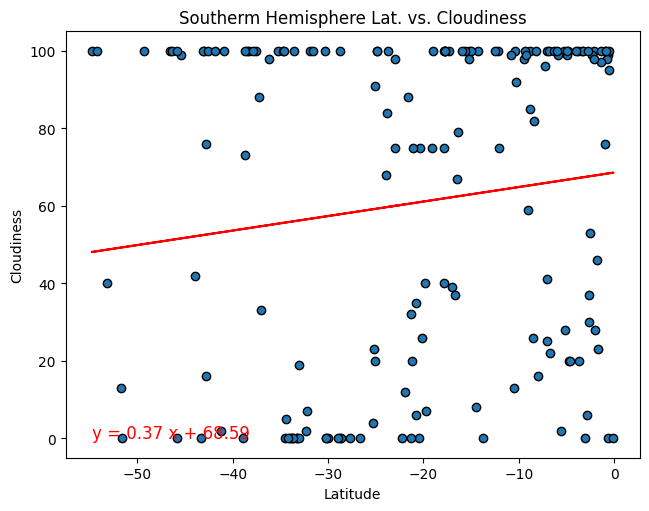

In [21]:
# Southern Hemisphere
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southerm Hemisphere Lat. vs. Cloudiness")
plt.show()

**Discussion about the linear relationship:** The plots show a weak positive relationship between lat and cloudiness in both hemispheres. In the Northern Hemisphere (y= 0.53x = 48.47,r = 0.236), cloudiness increases slightly with latitude, while in the Southern Hemisphere(y = 0.37x + 68.58, r = 0.132), the trend is weaker. The scattered data and low r-values show the lat has minimal influence on cloudiness in either hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

r-value: 0.2273322015276677.


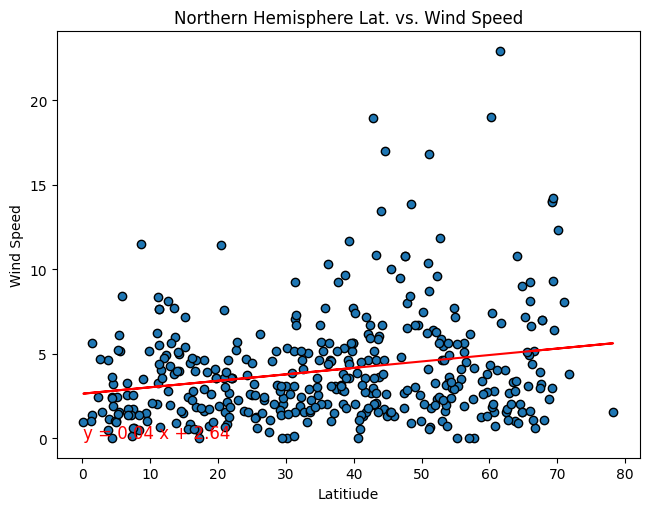

In [22]:
# Northern Hemisphere
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitiude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Lat. vs. Wind Speed")
plt.show()

r-value: -0.2529226831777593.


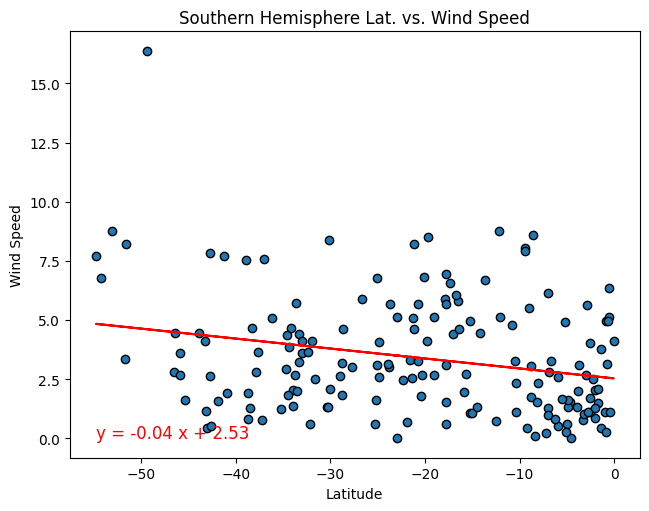

In [23]:
# Southern Hemisphere
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Lat. vs. Wind Speed")
plt.show()

**Discussion about the linear relationship:** The plots show a weak relationship between latitude and wind speed in both hemispheres. In the Northern Hemisphere (y = 0.04x + 4.64, r = 0.227), wind speed slightly increases with lat, while in the Southern Hemisphere (y = -0.04x + 2.53, r = -0.253), wind speed slightly decreases as the lat moves toward the equator. Both trends are weak, with scattered data indicating that lat has minimal influence on wind speed in either hemisphere.